Загрузка PySpark

In [1]:
import findspark
findspark.init()

location = findspark.find()

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = location

In [5]:
from pyspark.sql import SparkSession


spark = SparkSession.builder.getOrCreate()


sc = spark.sparkContext

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=spark.read.csv('./iris.csv', inferSchema=True, header=True)

In [10]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal.length|        sepal.width|      petal.length|       petal.width|  variety|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [6]:
df1 = df.withColumnRenamed('sepal.length','sl') \
        .withColumnRenamed('sepal.width','sw') \
        .withColumnRenamed('petal.length','pl') \
        .withColumnRenamed('petal.width','pw')

In [19]:
df1.take(5)

[Row(sl=5.1, sw=3.5, pl=1.4, pw=0.2, variety='Setosa'),
 Row(sl=4.9, sw=3.0, pl=1.4, pw=0.2, variety='Setosa'),
 Row(sl=4.7, sw=3.2, pl=1.3, pw=0.2, variety='Setosa'),
 Row(sl=4.6, sw=3.1, pl=1.5, pw=0.2, variety='Setosa'),
 Row(sl=5.0, sw=3.6, pl=1.4, pw=0.2, variety='Setosa')]

In [23]:
df1.groupBy('variety').max().show()

+----------+-------+-------+-------+-------+
|   variety|max(sl)|max(sw)|max(pl)|max(pw)|
+----------+-------+-------+-------+-------+
| Virginica|    7.9|    3.8|    6.9|    2.5|
|    Setosa|    5.8|    4.4|    1.9|    0.6|
|Versicolor|    7.0|    3.4|    5.1|    1.8|
+----------+-------+-------+-------+-------+



In [24]:
df1.groupBy('variety').min().show()

+----------+-------+-------+-------+-------+
|   variety|min(sl)|min(sw)|min(pl)|min(pw)|
+----------+-------+-------+-------+-------+
| Virginica|    4.9|    2.2|    4.5|    1.4|
|    Setosa|    4.3|    2.3|    1.0|    0.1|
|Versicolor|    4.9|    2.0|    3.0|    1.0|
+----------+-------+-------+-------+-------+



In [26]:
df1.groupBy('variety').mean().show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|          avg(sl)|           avg(sw)|           avg(pl)|           avg(pw)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [7]:
pdf = df1.toPandas()

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

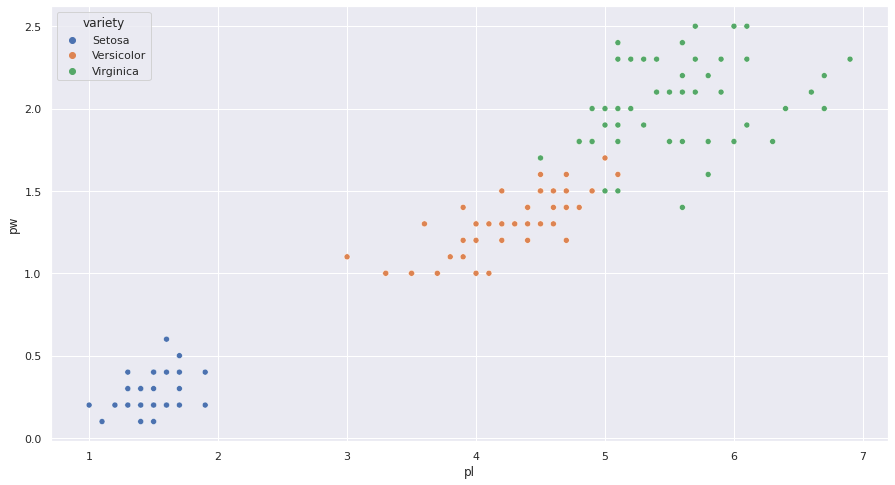

In [10]:
sns.scatterplot(data=pdf, x="pl", y="pw", hue="variety");

In [11]:
from pyspark.sql.functions import when
df1 = df1.withColumn("prediction", when(df1.pl < 2 ,'Setosa').otherwise('Unknown'))

In [12]:
df1.where(df1['prediction'] == df1['variety']).count()

50

In [13]:
df1.where(df1['variety'] != df1['variety']).count()

0

In [ ]:
sc.stop()